In [10]:
import cv2
from sympy import fwht, ifwht
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [11]:
plt.style.use("seaborn-v0_8")
# plt.rcParams["grid.linestyle"] = "--"
plt.rcParams["grid.alpha"] = 0

plt.rcParams["figure.figsize"] = (30, 10)

for ticks in ["xtick", "ytick"]:
    for side in ["top", "bottom", "left", "right"]:
        try:
            plt.rcParams[f"{ticks}.label{side}"] = False
        except KeyError:
            pass

In [12]:
buffy = "img/buffy_headphones.png"
buffy_gray = cv2.imread(buffy, cv2.IMREAD_GRAYSCALE)
buffy_gray = cv2.resize(buffy_gray, (1024, 1024))

In [13]:
def fwht2d(image):
    fwht_image = np.zeros_like(image, dtype=np.float32)

    for i in range(fwht_image.shape[0]):
        fwht_image[i, :] = np.array(fwht(image[i, :])).astype(np.float32)

    for j in range(fwht_image.shape[1]):
        fwht_image[:, j] = np.array(fwht(fwht_image[:, j])).astype(np.float32)

    return fwht_image

In [14]:
def ifwht2d(fwht_image):
    reconstructed = np.zeros_like(fwht_image, dtype=np.float32)

    for j in range(reconstructed.shape[1]):
        reconstructed[:, j] = np.array(ifwht(fwht_image[:, j])).astype(np.float32)

    for i in range(reconstructed.shape[0]):
        reconstructed[i, :] = np.array(ifwht(reconstructed[i, :])).astype(np.float32)

    return reconstructed

In [16]:
def apply_threshold_filter(freq, threshold=0.005):
    threshold = threshold * np.max(np.abs(freq))
    filtered = np.where(np.abs(freq) > threshold, freq, 0.00001)
    return filtered

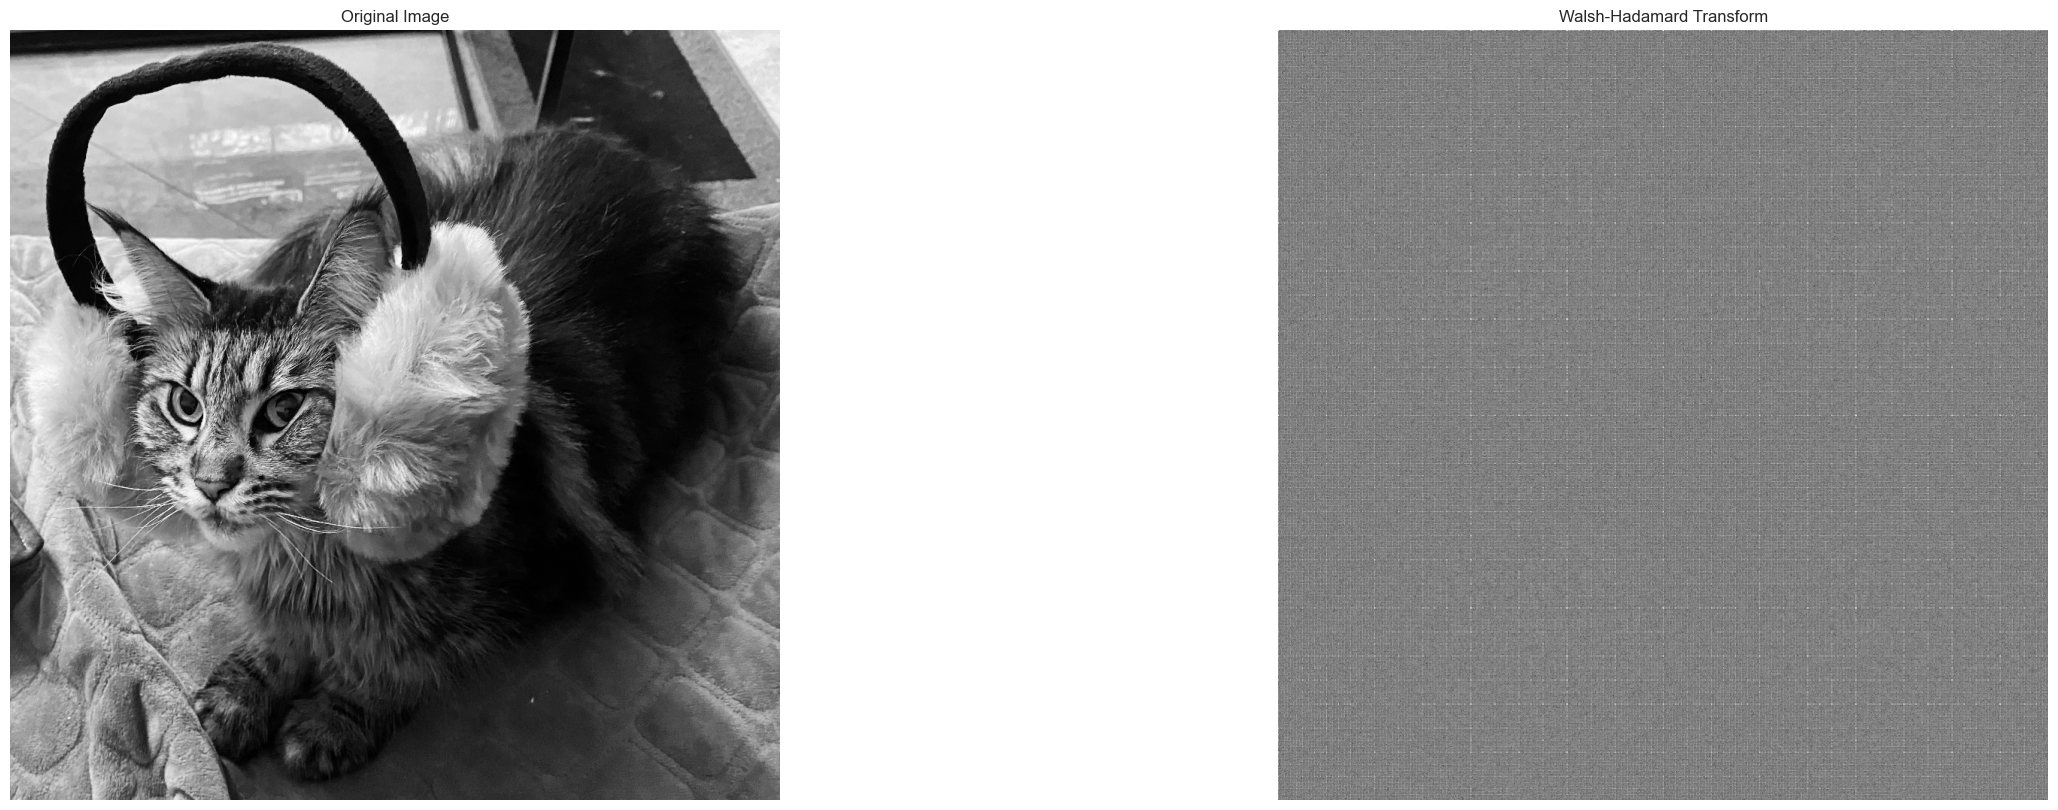

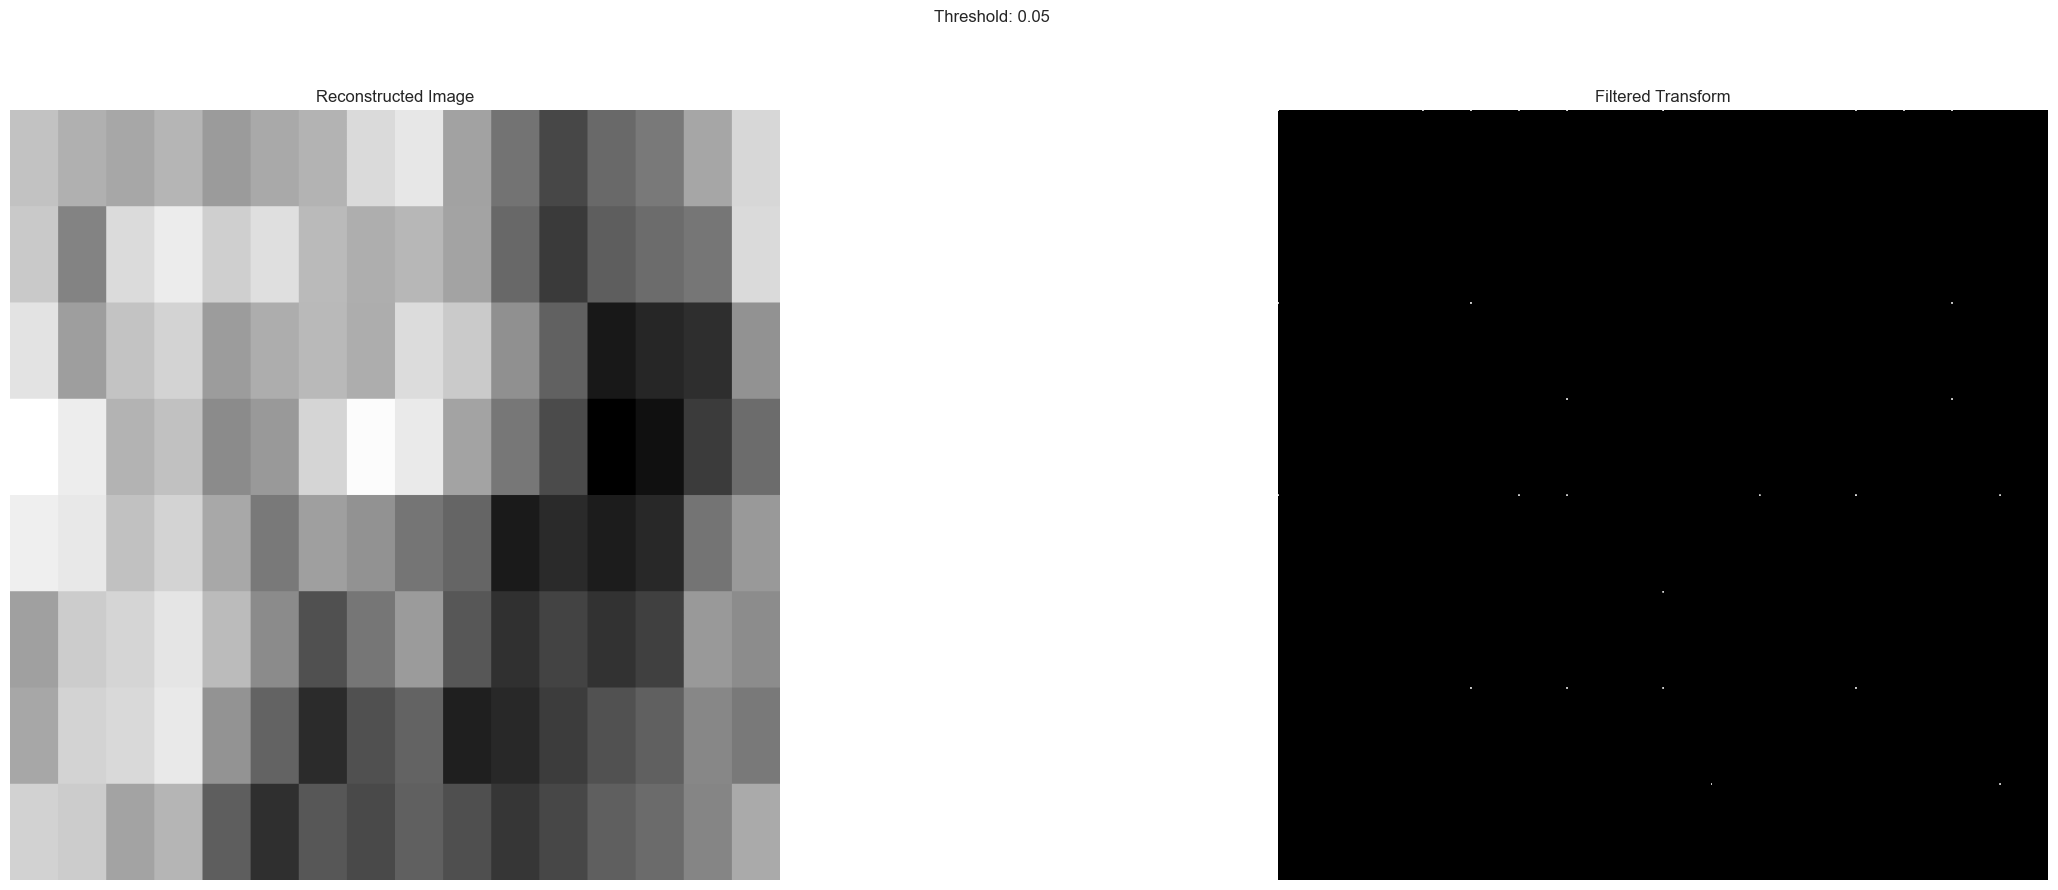

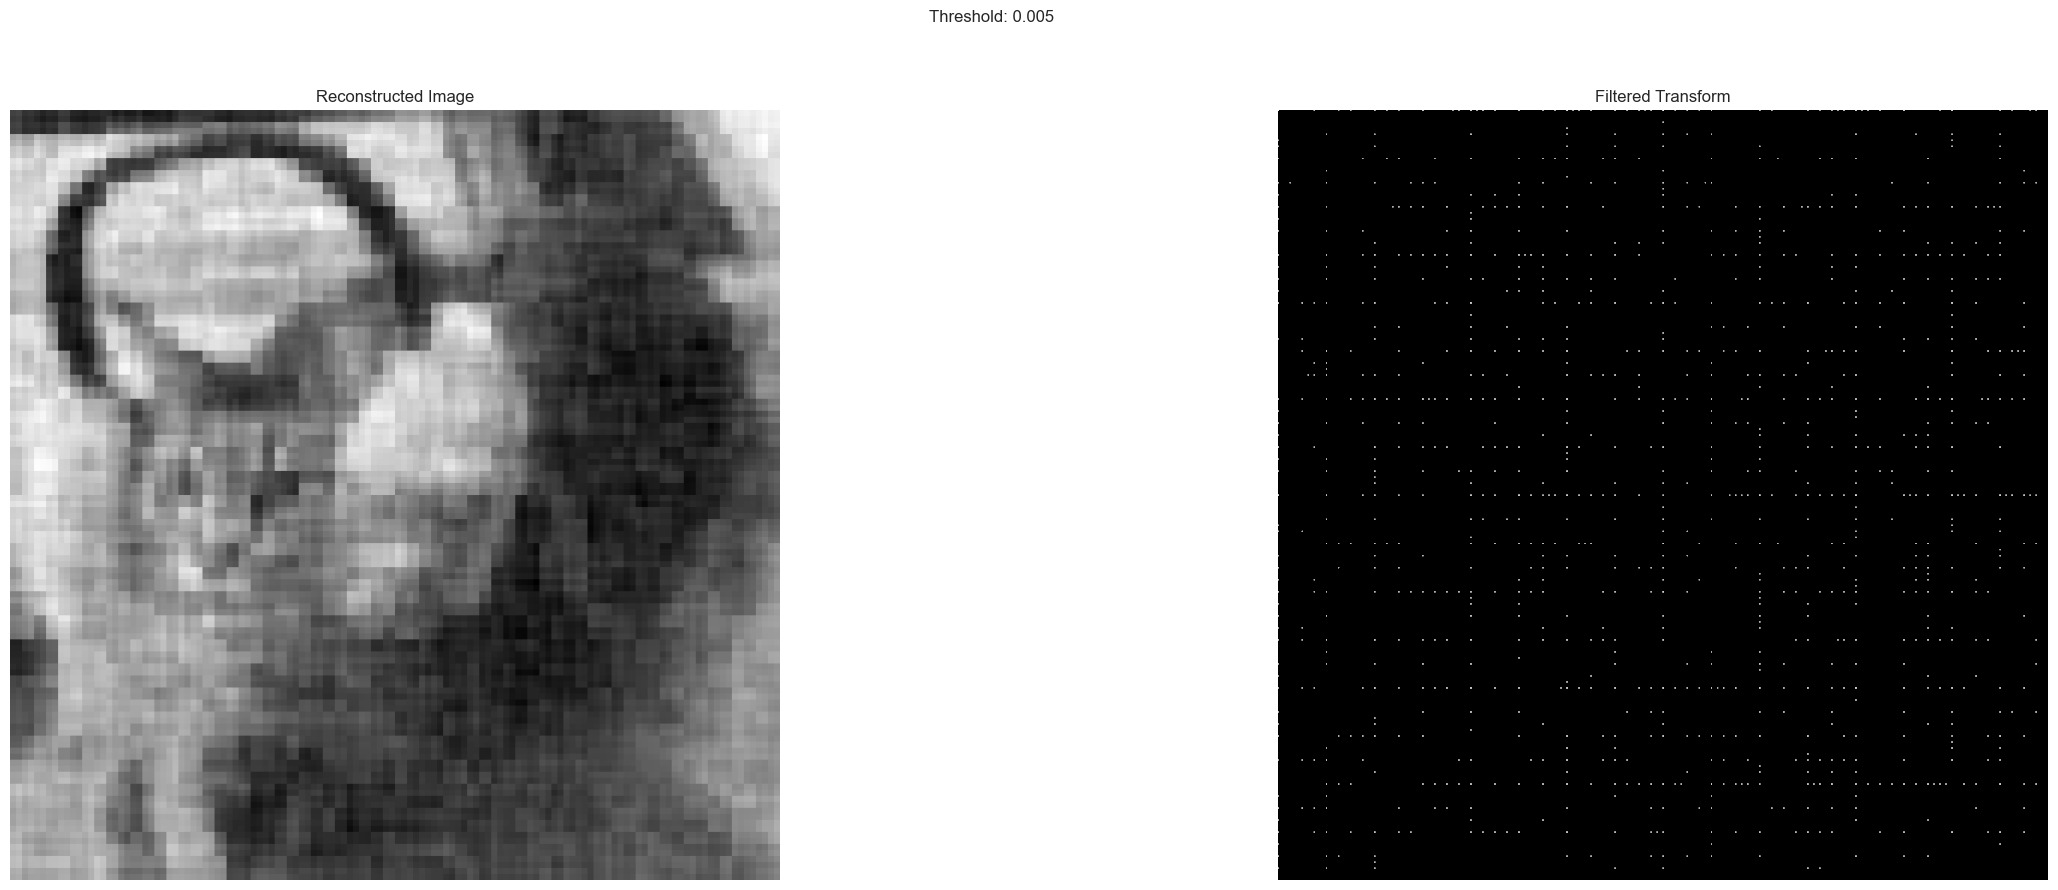

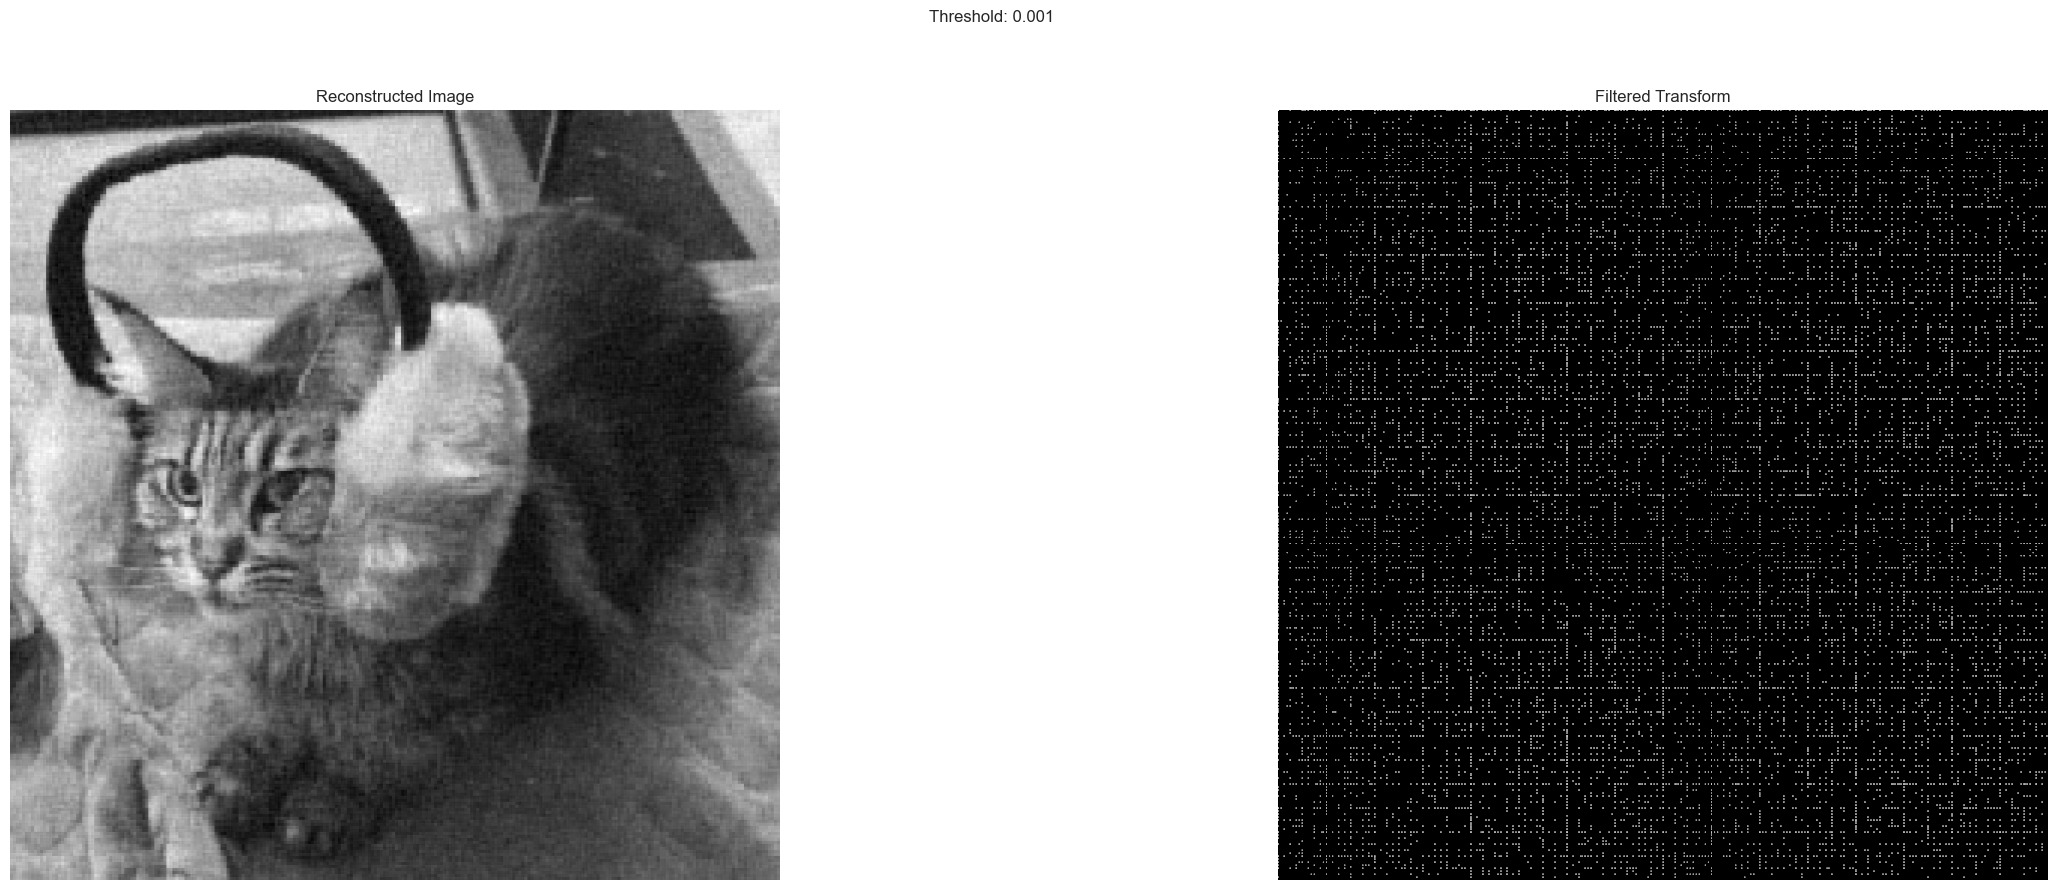

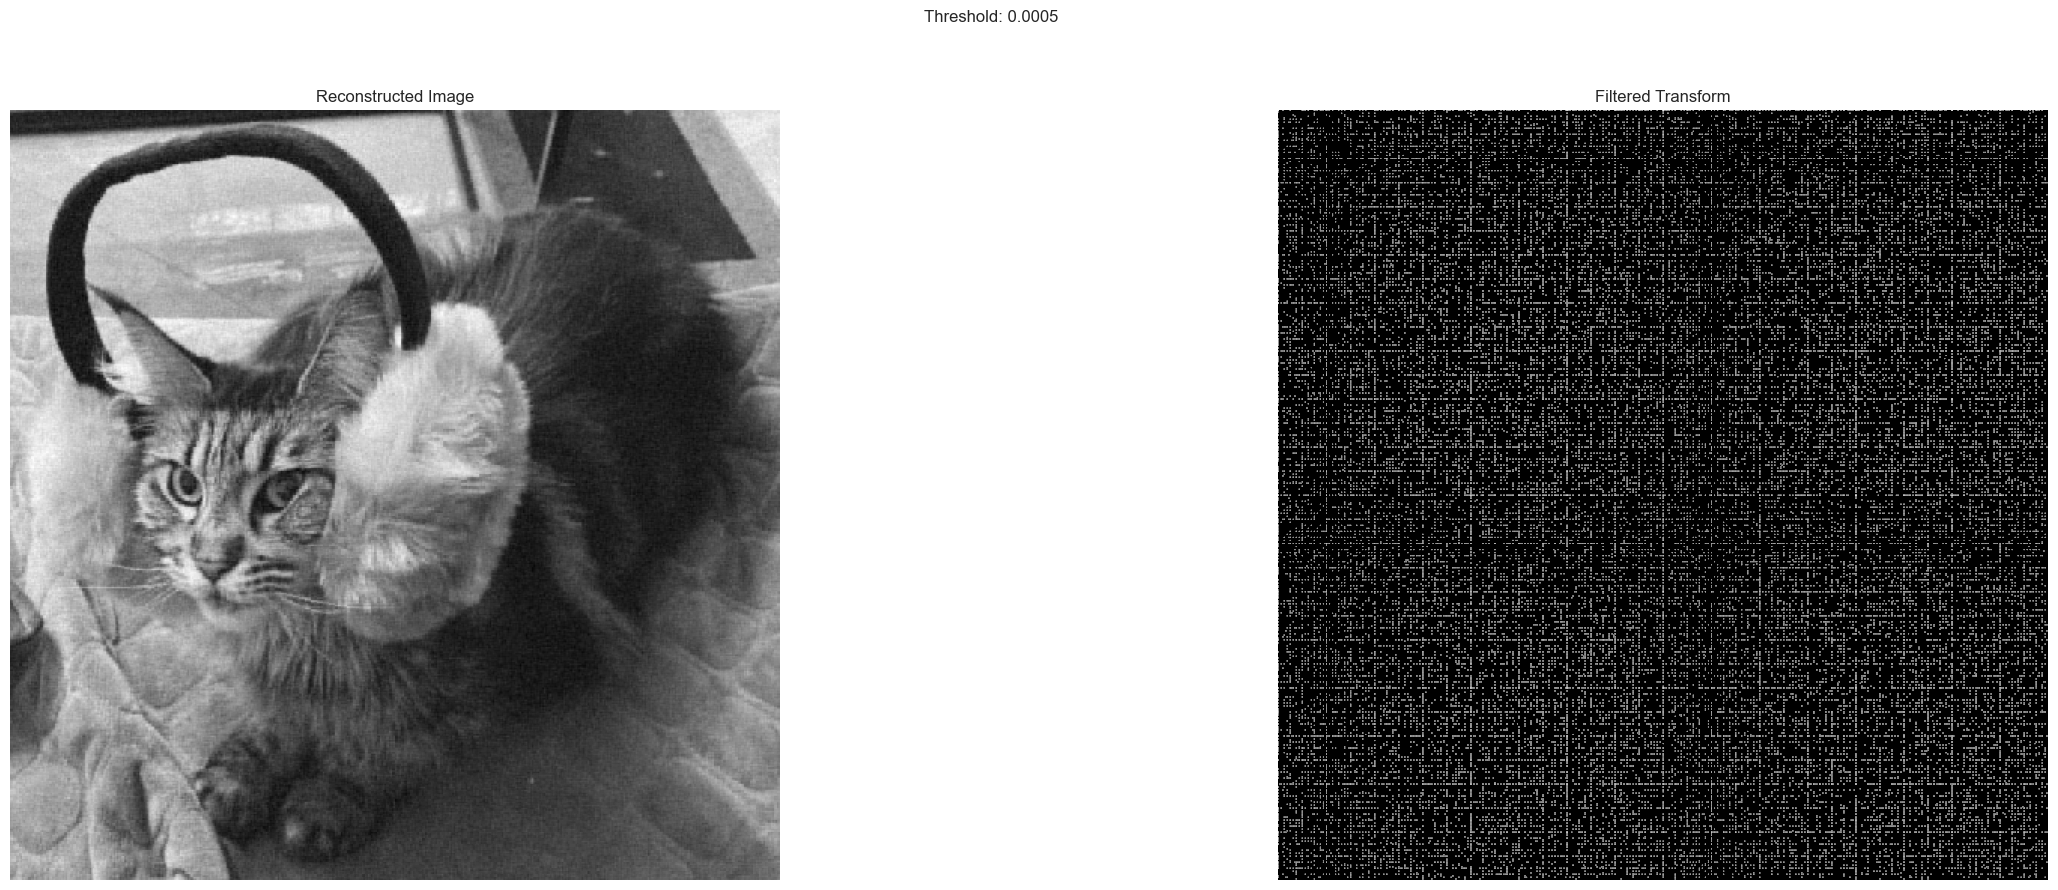

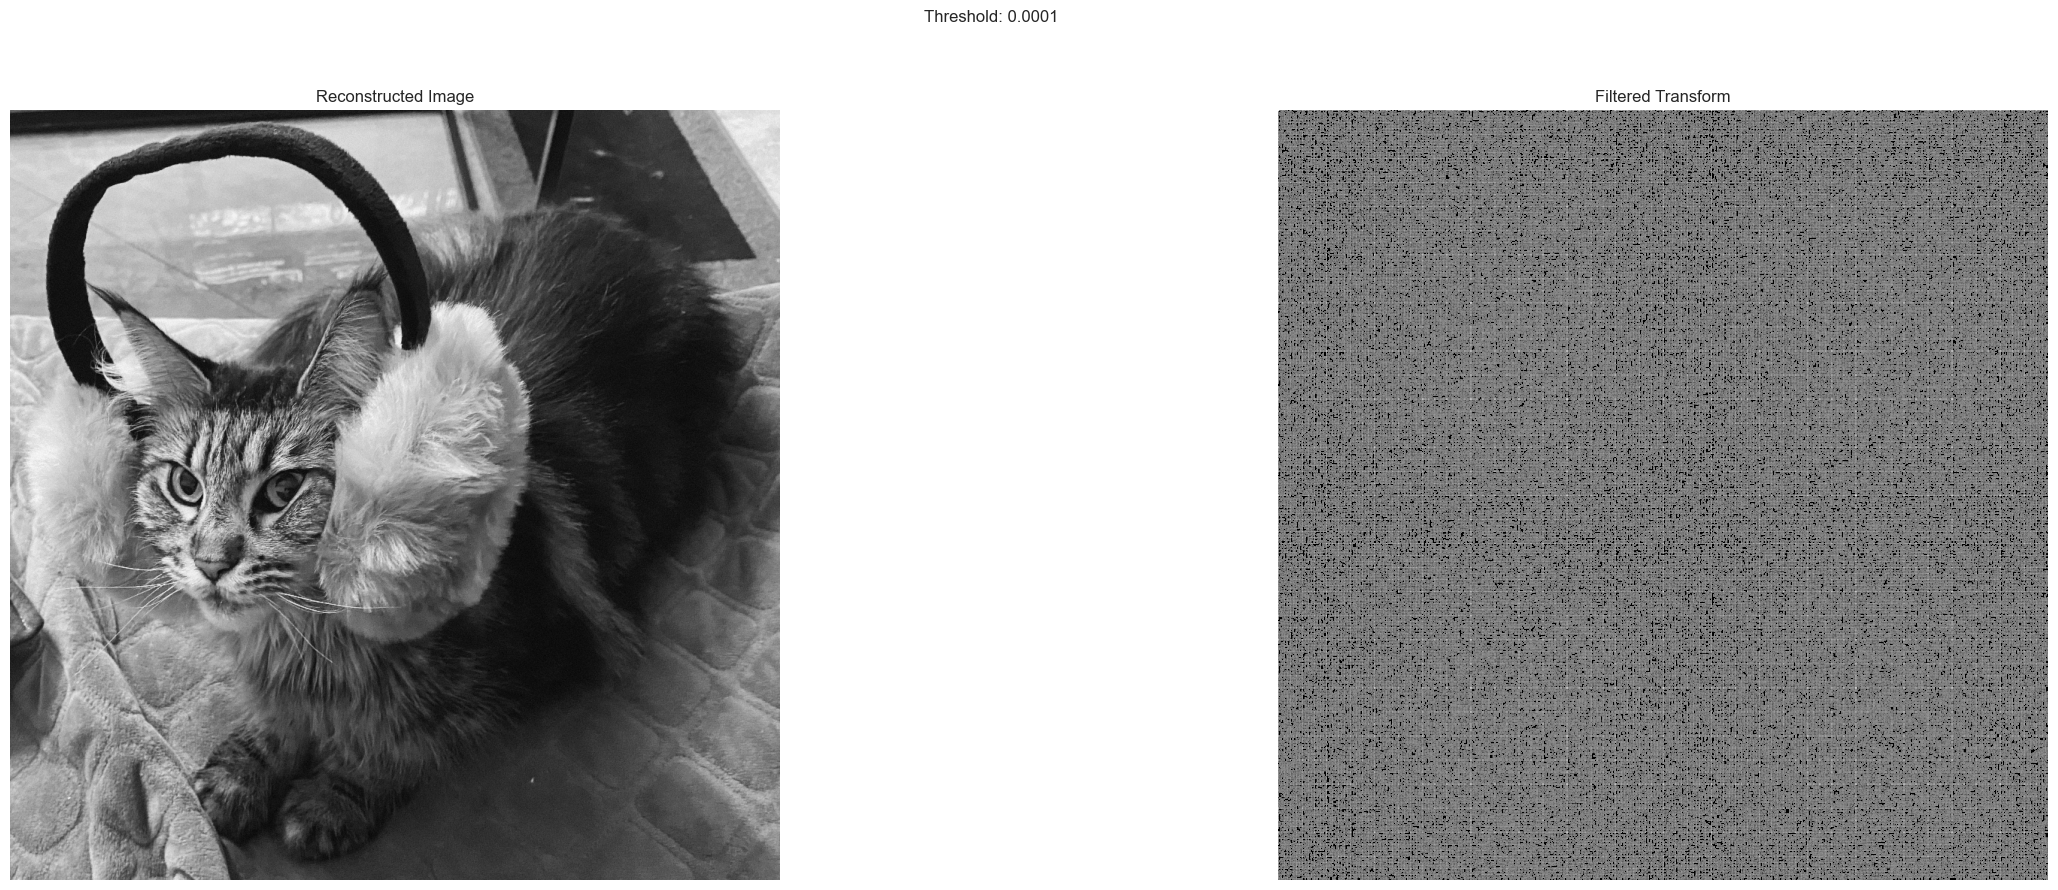

In [20]:
fwht_image = fwht2d(buffy_gray)

plt.subplot(1, 2, 1).set_title("Original Image")
plt.imshow(buffy_gray, cmap="gray")

plt.subplot(1, 2, 2).set_title("Walsh-Hadamard Transform")
plt.imshow(np.abs(fwht_image), cmap="gray", norm=LogNorm(1))

plt.show()


for threshold in [0.05, 0.005, 0.001, 0.0005, 0.0001]:
    filtered = apply_threshold_filter(fwht_image, threshold)

    reconstructed = ifwht2d(filtered)

    plt.subplot(1, 2, 1).set_title("Reconstructed Image")
    plt.imshow(reconstructed, cmap="gray")

    plt.subplot(1, 2, 2).set_title("Filtered Transform")
    plt.imshow(np.abs(filtered), cmap="gray", norm=LogNorm(1))

    plt.suptitle(f"Threshold: {threshold}")
    plt.show()